In [ ]:
!pip install pdf2image

In [ ]:
!pip install --use-pep517 python-poppler

In [ ]:
!git clone 'https://github.com/facebookresearch/detectron2'

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [2]:
import os
os.chdir("/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/src")
cwd = os.getcwd()

print(cwd)

/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/src


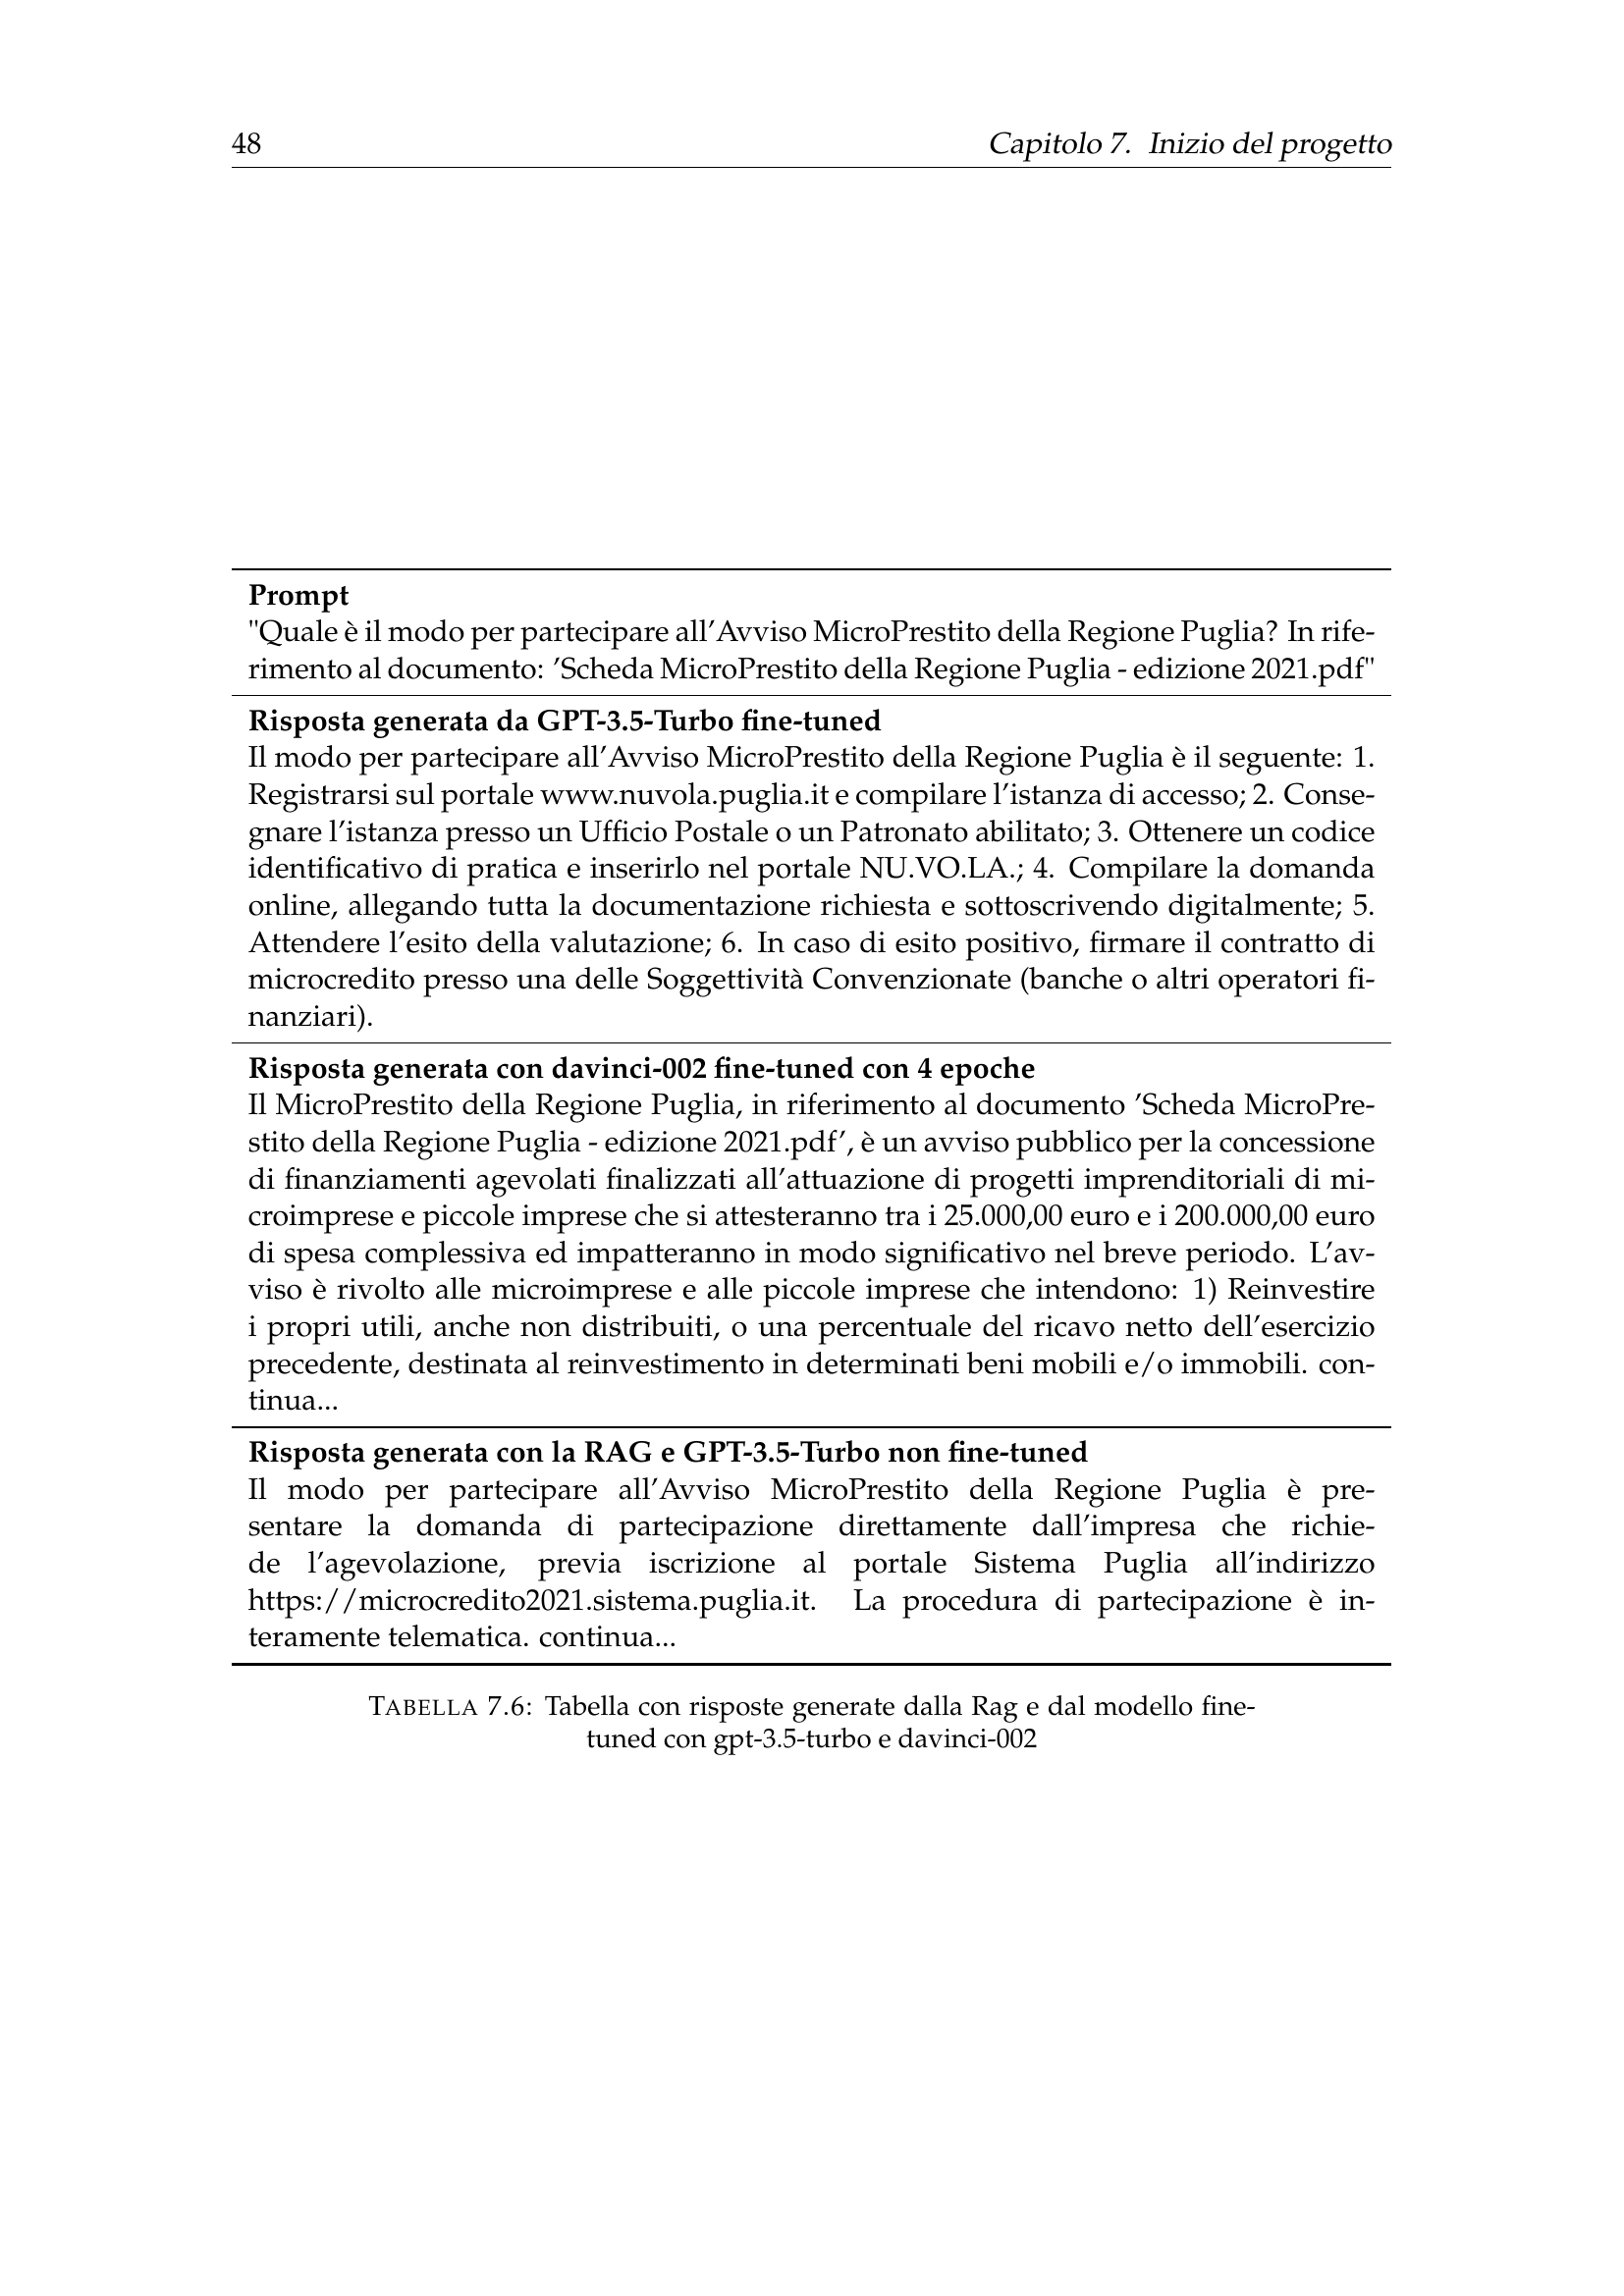

In [2]:
# READ AS IMAGE
import pdf2image
doc = pdf2image.convert_from_path("./Docs/Tesi_Giacomo_Signorile (6).pdf")
len(doc) #<-- check num pages
doc[57]   #<-- visualize a page

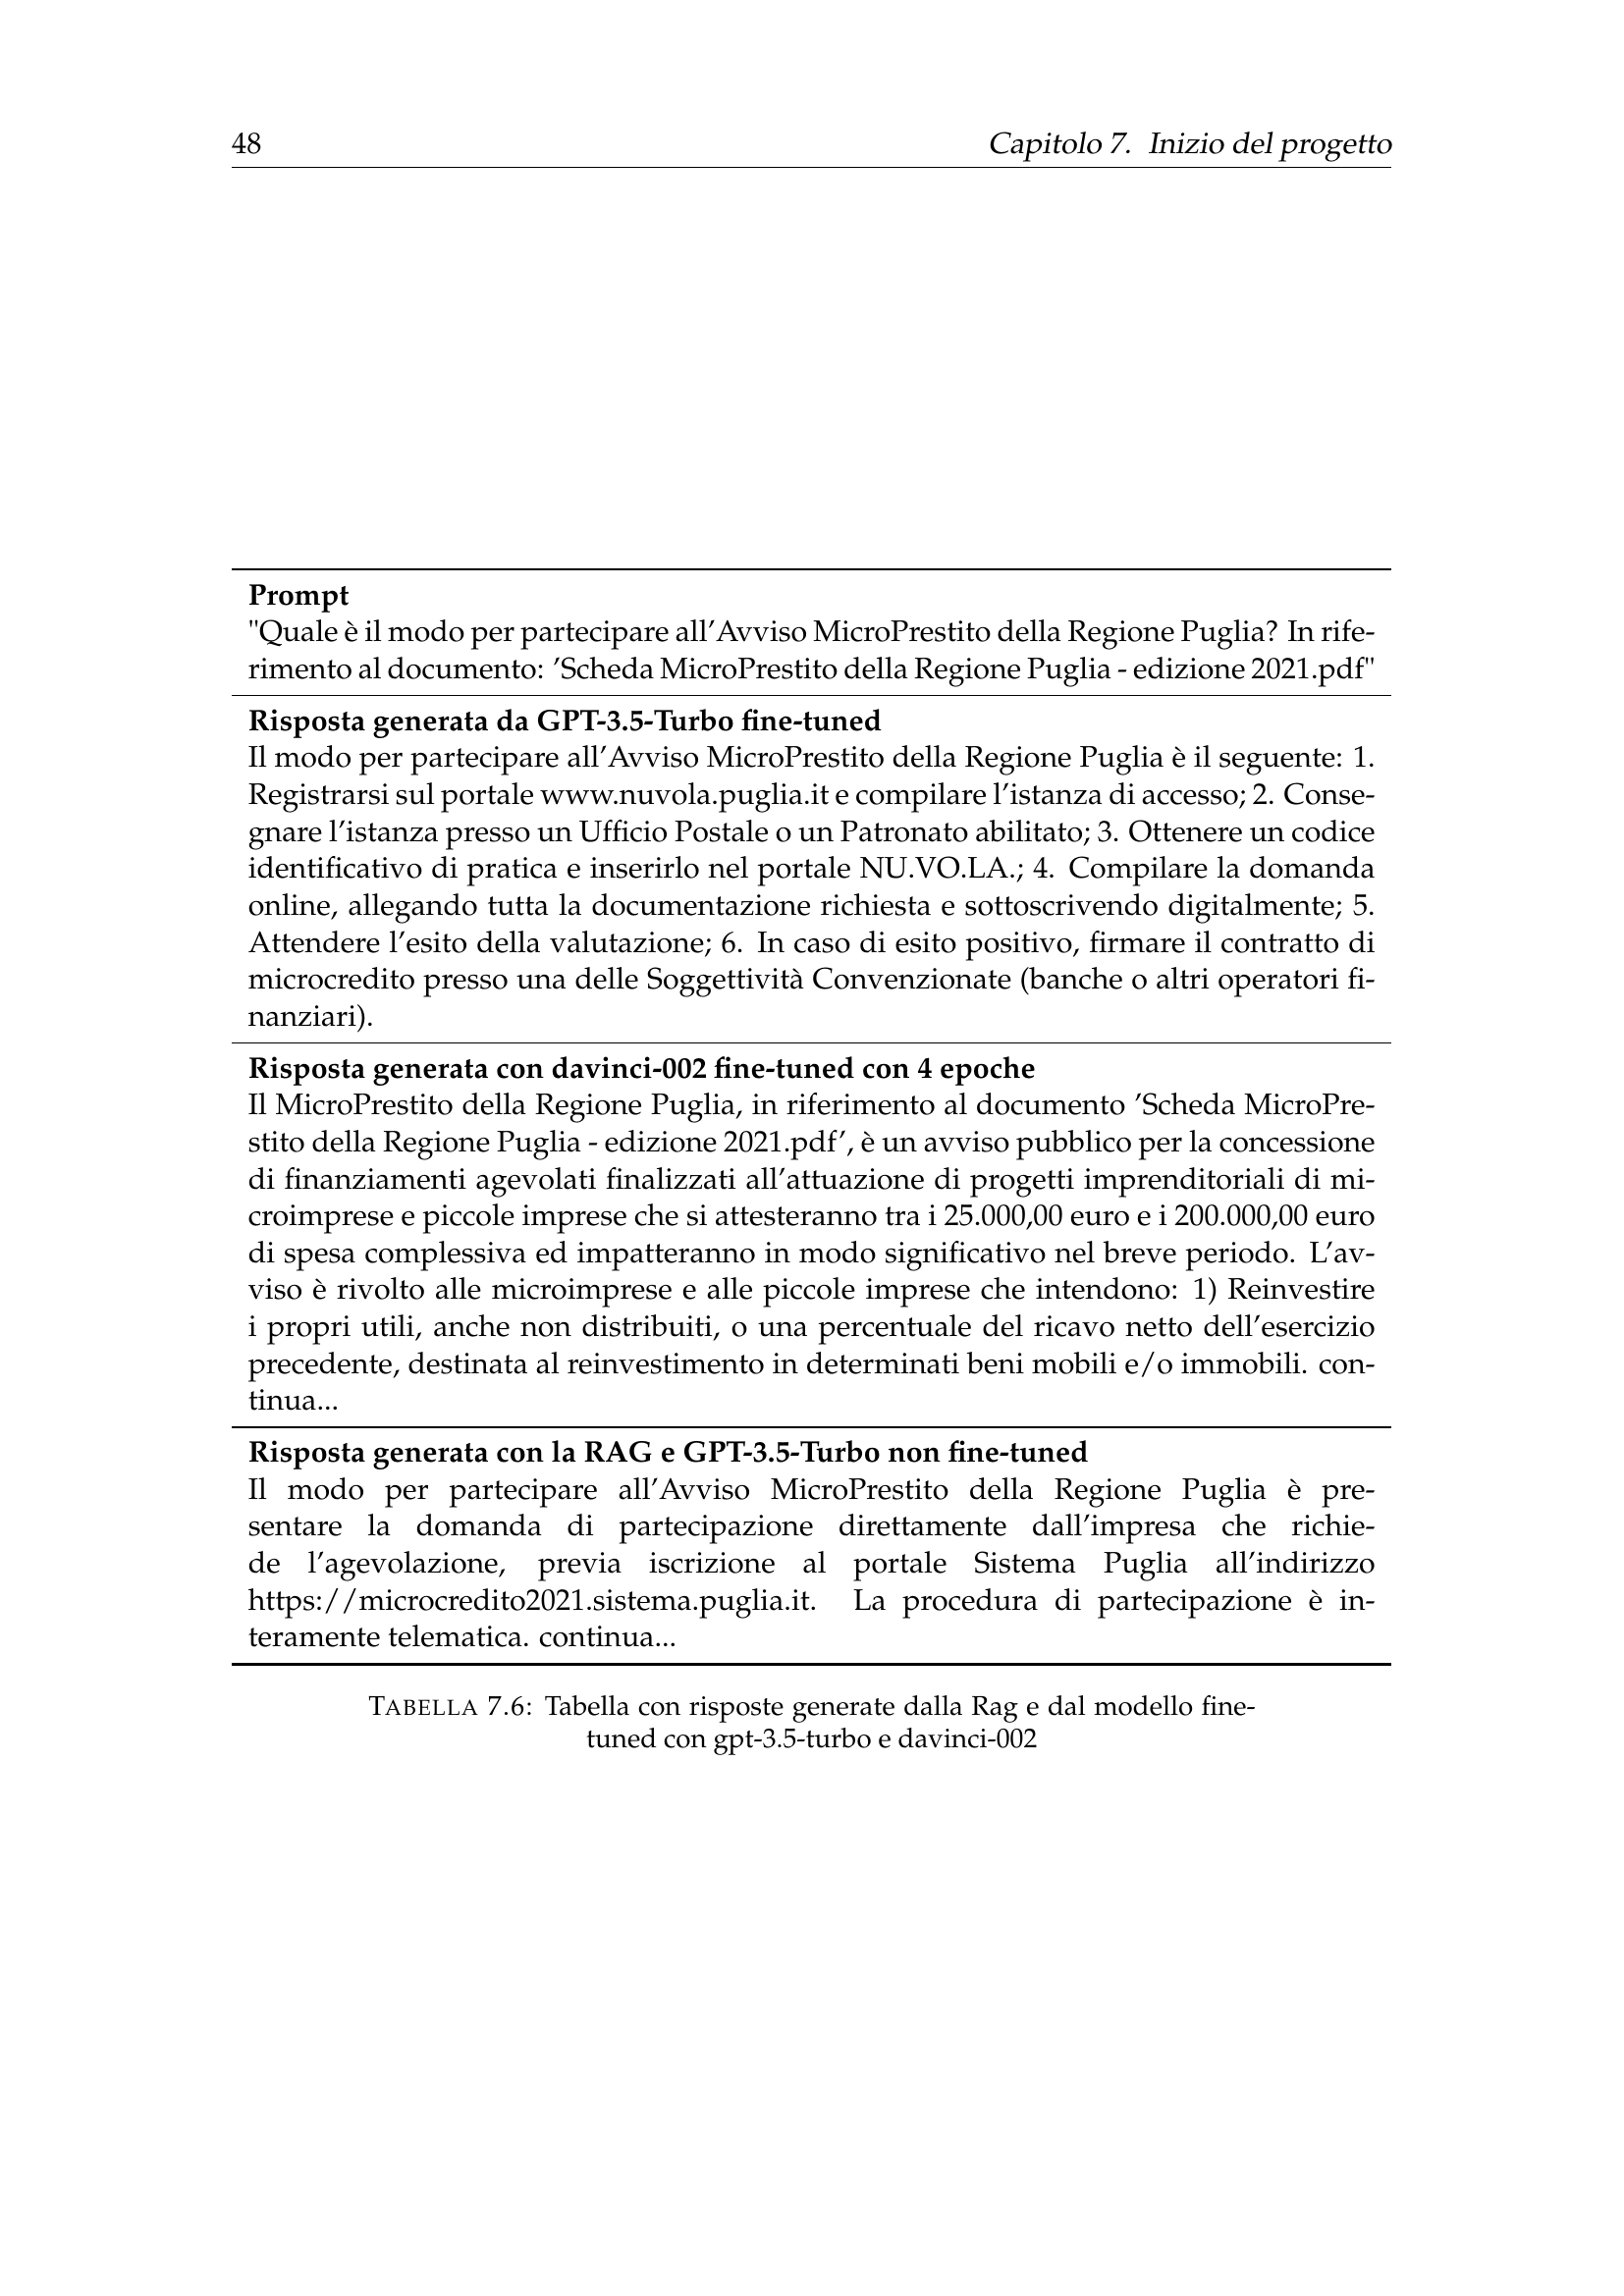

In [4]:
doc[57] 

In [3]:
!pip install img2table

     ---------------------------------------- 0.0/91.4 kB ? eta -:--:--
     ------------------------------- -------- 71.7/91.4 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 91.4/91.4 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
     ---------------------------------------- 0.2/25.6 MB 3.3 MB/s eta 0:00:08
     ---------------------------------------- 0.3/25.6 MB 3.2 MB/s eta 0:00:09
      --------------------------------------- 0.5/25.6 MB 4.1 MB/s eta 0:00:07
     - -------------------------------------- 0.8/25.6 MB 4.4 MB/s eta 0:00:06
     - -------------------------------------- 1.0/25.6 MB 4.4 MB/s eta 0:00:06
     - -------------------------------------- 1.2/25.6 MB 4.4 MB/s eta 0:00:06
     -- ------------------------------------- 1.4/25.6 MB 4.4 MB/s eta 0:00:06
     -- ------------------------------------- 1.7/25.6 MB 4.5 MB/s eta 0:00:06
     --- ------------------------------------ 1.9/25.6 MB 4.6 MB


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
src = "./Docs/Fine-Tuning-pdf.pdf"


# #output
# [ExtractedTable(title=None, bbox=(10, 8, 745, 314),shape=(6, 3)),
#  ExtractedTable(title=None, bbox=(936, 9, 1129, 111),shape=(2, 2))]

{7: [], 8: []}

Detection

In [16]:
!pip install TesseractOCR

ERROR: Could not find a version that satisfies the requirement TesseractOCR (from versions: none)
ERROR: No matching distribution found for TesseractOCR

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
!pip install utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for utils: started
  Running setup.py install for utils: finished with status 'done'


  DEPRECATION: utils is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import os
import cv2
from IPython.display import display_html, display
from PIL import Image as PILImage

from img2table.document import PDF
from img2table.ocr import TesseractOCR, PaddleOCR
ocr = PaddleOCR(lang='en, it') 

src = "/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/docs/bandi/Scheda Avviso Pubblico IFTS_2023.pdf"
doc = PDF(src)
# Table extraction
extracted_tables= doc.extract_tables(ocr=ocr, implicit_rows=False, borderless_tables=True, min_confidence=99)

AssertionError: param lang must in dict_keys(['ch', 'en', 'korean', 'japan', 'chinese_cht', 'ta', 'te', 'ka', 'latin', 'arabic', 'cyrillic', 'devanagari']), but got en, it

In [30]:
extracted_tables[0][0].df

,0,1,2
0,generali Informazioni,Titolo bando,IFTS/23 - Avviso pubblico per il finanziamento...
1,generali Informazioni,Descrizione,Coerentemente con quanto disposto dalla Missio...
2,generali Informazioni,Risultati attesi,Coerentemente con il documento di programmazio...
3,generali Informazioni,Destinatari,Giovani e adulti che hanno assolto o sono pros...


In [35]:
table1 = extracted_tables[0][0].df.to_markdown(index=False)
listText = table1.split()
text = ' '.join(listText)

print(text)

| 0 | 1 | 2 | |:----------------------|:-----------------|:-------------------------------------------------------------------| | generali Informazioni | Titolo bando | IFTS/23 - Avviso pubblico per il finanziamento di | | | | percorsi di Istruzione e Formazione Tecnica Superiore (IFTS) in | | | | modalità duale. | | generali Informazioni | Descrizione | Coerentemente con quanto disposto dalla Missione 5 – | | | | Componente 1 – Investimento 1.4 “Sistema duale” del Piano | | | | Nazionale di Ripresa e Resilienza (PNRR), il presente avviso | | | | concorre a stimolare e sostenere l’occupazione formando figure | | | | professionali con caratteristiche di eccellenza. | | generali Informazioni | Risultati attesi | Coerentemente con il documento di programmazione regionale | | | | si prevede la realizzazione di 300 percorsi IFTS. | | generali Informazioni | Destinatari | Giovani e adulti che hanno assolto o sono prosciolti dal diritto- | | | | dovere e proseguono gli studi per acquisire il 

In [5]:
extracted_tables

{0: [],
 1: [],
 2: [ExtractedTable(title=Introduzione
  1, bbox=(229, 792, 1426, 1338),shape=(12, 4)),
  ExtractedTable(title=None, bbox=(229, 1368, 1425, 2096),shape=(16, 5))],
 3: [ExtractedTable(title=IV, bbox=(230, 224, 1425, 503),shape=(6, 4)),
  ExtractedTable(title=None, bbox=(229, 528, 1424, 806),shape=(6, 4)),
  ExtractedTable(title=None, bbox=(230, 830, 1425, 1101),shape=(6, 4)),
  ExtractedTable(title=None, bbox=(230, 1133, 1424, 1731),shape=(13, 4)),
  ExtractedTable(title=None, bbox=(230, 1754, 1424, 2125),shape=(8, 4))],
 4: [ExtractedTable(title=V, bbox=(277, 225, 1424, 638),shape=(9, 4)),
  ExtractedTable(title=None, bbox=(231, 664, 1423, 847),shape=(4, 4)),
  ExtractedTable(title=None, bbox=(231, 876, 1424, 1092),shape=(4, 3))],
 5: [],
 6: [ExtractedTable(title=Elenco delle figure, bbox=(274, 555, 1425, 815),shape=(3, 3))],
 7: [],
 8: [ExtractedTable(title=Elenco delle tabelle, bbox=(277, 564, 1423, 970),shape=(9, 3))],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 1

In [22]:
for page, tables in extracted_tables.items():
    for idx, table in enumerate(tables):
        display_html(table.html_repr(title=f"Page {page + 1} - Extracted table n°{idx + 1}"), raw=True)


,0,1,2
0,generali Informazioni,Titolo bando,IFTS/23 - Avviso pubblico per il finanziamento di\npercorsi di Istruzione e Formazione Tecnica Superiore (IFTS) in\nmodalità duale.
1,generali Informazioni,Descrizione,"Coerentemente con quanto disposto dalla Missione 5 –\nComponente 1 – Investimento 1.4 “Sistema duale” del Piano\nNazionale di Ripresa e Resilienza (PNRR), il presente avviso\nconcorre a stimolare e sostenere l’occupazione formando figure\nprofessionali con caratteristiche di eccellenza."
2,generali Informazioni,Risultati attesi,Coerentemente con il documento di programmazione regionale\nsi prevede la realizzazione di 300 percorsi IFTS.
3,generali Informazioni,Destinatari,"Giovani e adulti che hanno assolto o sono prosciolti dal diritto-\ndovere e proseguono gli studi per acquisire il certificato di\nspecializzazione tecnica superiore (IFTS), in possesso di:\n-\ndiploma di istruzione secondaria di secondo grado;\n-\ndiploma professionale IeFP coerente con il percorso di\nIFTS di cui si intende conseguire la specializzazione.\nL'accesso ai percorsi IFTS è consentito anche a coloro che sono in\npossesso dell'ammissione al quinto anno dei percorsi liceali, ai\nsensi del decreto legislativo 17 ottobre 2005, n. 226, art. 2,\ncomma 5, nonché a coloro che non sono in possesso del diploma\ndi istruzione secondaria superiore, previo accreditamento delle\ncompetenze acquisite in precedenti percorsi di istruzione,\nformazione e lavoro successivi all'assolvimento dell'obbligo di\nistruzione di cui al regolamento adottato con decreto del Ministro\ndella Pubblica Istruzione 22 agosto 2007, n. 139."


,0,1,2
0,,Beneficiari,Possono presentare proposte di percorsi nell’ambito del
1,,,presente Avviso:
2,,,"-\nle Fondazioni ITS Academy che intendono erogare\npercorsi IFTS. In tale fattispecie, i percorsi IFTS erogati\ndalle\nFondazioni\nITS\ncon\nriferimento\nalle"
3,,,"specializzazioni IFTS, sono corrispondenti agli ambiti\ndelle aree tecnologiche definite dall’allegato B del\ndecreto MIUR 7 febbraio 2013, in attuazione al Capo III\ndel DPCM 25 gennaio 2008, allo scopo di soddisfare il\nfabbisogno formativo di una determinata filiera\nproduttiva territoriale. Le Fondazioni ITS possono\nattivare percorsi riferiti a specializzazioni IFTS anche in\naltre aree tecnologiche sempreché strettamente\ncorrelate\na\ndocumentate\nesigenze\ndella\nfiliera\nproduttiva di riferimento."
4,può,,-\nATS costituite o da costituire ai sensi art.69 L.144/99
5,partecipare\nChi,,"composte\nda\nsoggetti\nappartenenti\nai\nsistemi\ndell’istruzione,\ndell’istruzione\ne\nformazione"
6,,,"professionale,\ndella\nformazione\nprofessionale,\ndell’università e del lavoro. Nel dettaglio, l’ATS dovrà\nessere costituita almeno da:"
7,,,•\nun Ente di formazione professionale\naccreditato presso la Regione Puglia (SOGGETTO\nCAPOFILA DELL’ATS);
8,,,•\nun Istituto scolastico del secondo ciclo di
9,,,istruzione avente sede nel territorio regionale;


,0,1,2
0,,Operazioni finanziabili,Con il presente Avviso si finanziano percorsi di Istruzione e
1,,,Formazione Tecnica Superiore (IFTS) di cui al DPCM 25 gennaio
2,,,2008 art. 4. I percorsi devono essere progettati e organizzati in
3,,,relazione all’esigenza di:
4,,,-\nassicurare un’offerta rispondente a fabbisogni\nformativi differenziati secondo criteri di flessibilità e
5,,,"modularità;\n-\nconsentire percorsi formativi personalizzati per\ngiovani e adulti in età lavorativa, con il\nriconoscimento dei crediti formativi acquisiti."
6,finanzia,,Tutti i percorsi individuali che saranno attivati a valere sul
7,Cosa,,"presente Avviso devono prevedere, tra gli obiettivi di"
8,,,"apprendimento, il raggiungimento minimo del livello 3"
9,,,(intermedio) del Digcomp 2.1 ai fini del monitoraggio del target


,0,1,2
0,,,"del DPCM 25 gennaio 2008, allo scopo di soddisfare il\nfabbisogno formativo di una determinata filiera\nproduttiva territoriale. Le Fondazioni ITS possono\nattivare percorsi riferiti a specializzazioni IFTS anche in\naltre aree tecnologiche sempreché strettamente\ncorrelate\na\ndocumentate\nesigenze\ndella\nfiliera\nproduttiva di riferimento.\n-\nATS costituite o da costituire ai sensi art.69 L.144/99\ncomposte\nda\nsoggetti\nappartenenti\nai\nsistemi\ndell’istruzione,\ndell’istruzione\ne\nformazione\nprofessionale,\ndella\nformazione\nprofessionale,\ndell’università e del lavoro. Nel dettaglio, l’ATS dovrà\nessere costituita almeno da:\n•\nun Ente di formazione professionale\naccreditato presso la Regione Puglia (SOGGETTO\nCAPOFILA DELL’ATS);\n•\nun Istituto scolastico del secondo ciclo di\nistruzione avente sede nel territorio regionale;\n•\nun’Università o Ente pubblico di ricerca\naventi sede nel territorio regionale;\n•\nun’impresa o associazione di imprese\navente almeno una sede legale e/o operativa nel\nterritorio regionale."
1,,,Procedura informatizzata presente su Sistema Puglia
2,,,Entro le ore 12:00 del 12.04.24
3,,Modulistica e allegati,Allegare file PDF compilabile
4,,Data di apertura,ore 12:00 del 13.03.2024
5,,Data di chiusura,ore 12:00 del 12.04.2024
6,Contatti,Sezione,Sezione Formazione
7,Contatti,Responsabile di\nProcedimento,Responsabile di Procedimento sino alla pubblicazione della\ngraduatoria Avv. Monica Calzetta.\nTel.080/5407645


,0,1,2
0,,,Mail: m.calzetta@regione.puglia.it\nResponsabile di Procedimento dopo la pubblicazione della\ngraduatoria Dr.ssa Francesca Cisternino\nTel.080/5407645\nMail: f.cisternino@regione.puglia.it
1,,Responsabile di Azione,Francesca Cisternino
2,,Responsabile di Azione,080/5405079
3,,Responsabile di Azione,Mail: f.cisternino@regione.puglia.it
4,,Sito web,https:// sistema. Puglia.it
5,Documenti,Avviso pubblico,Allegare alla mail file PDF
6,Documenti,Determinazione di\napprovazione,D.D. n. 420 del 07.03.24
7,Documenti,BURP,Orientativamente andrà in pubblicazione sul burp del 12.03.24.


In [14]:
!pip install pytesseract
!pip install "layoutparser[ocr]"

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install gdown


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
     ---------------- ---------------------- 61.4/147.9 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 147.9/147.9 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install --upgrade layoutparser
!pip install --upgrade pillow


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
!pip install Pillow==9.5.0

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


Rectangle(x_1=238.7361297607422, y_1=228.16497802734375, x_2=1407.82470703125, y_2=1151.931884765625)
Rectangle(x_1=218.7361297607422, y_1=208.16497802734375, x_2=1427.82470703125, y_2=1151.931884765625)


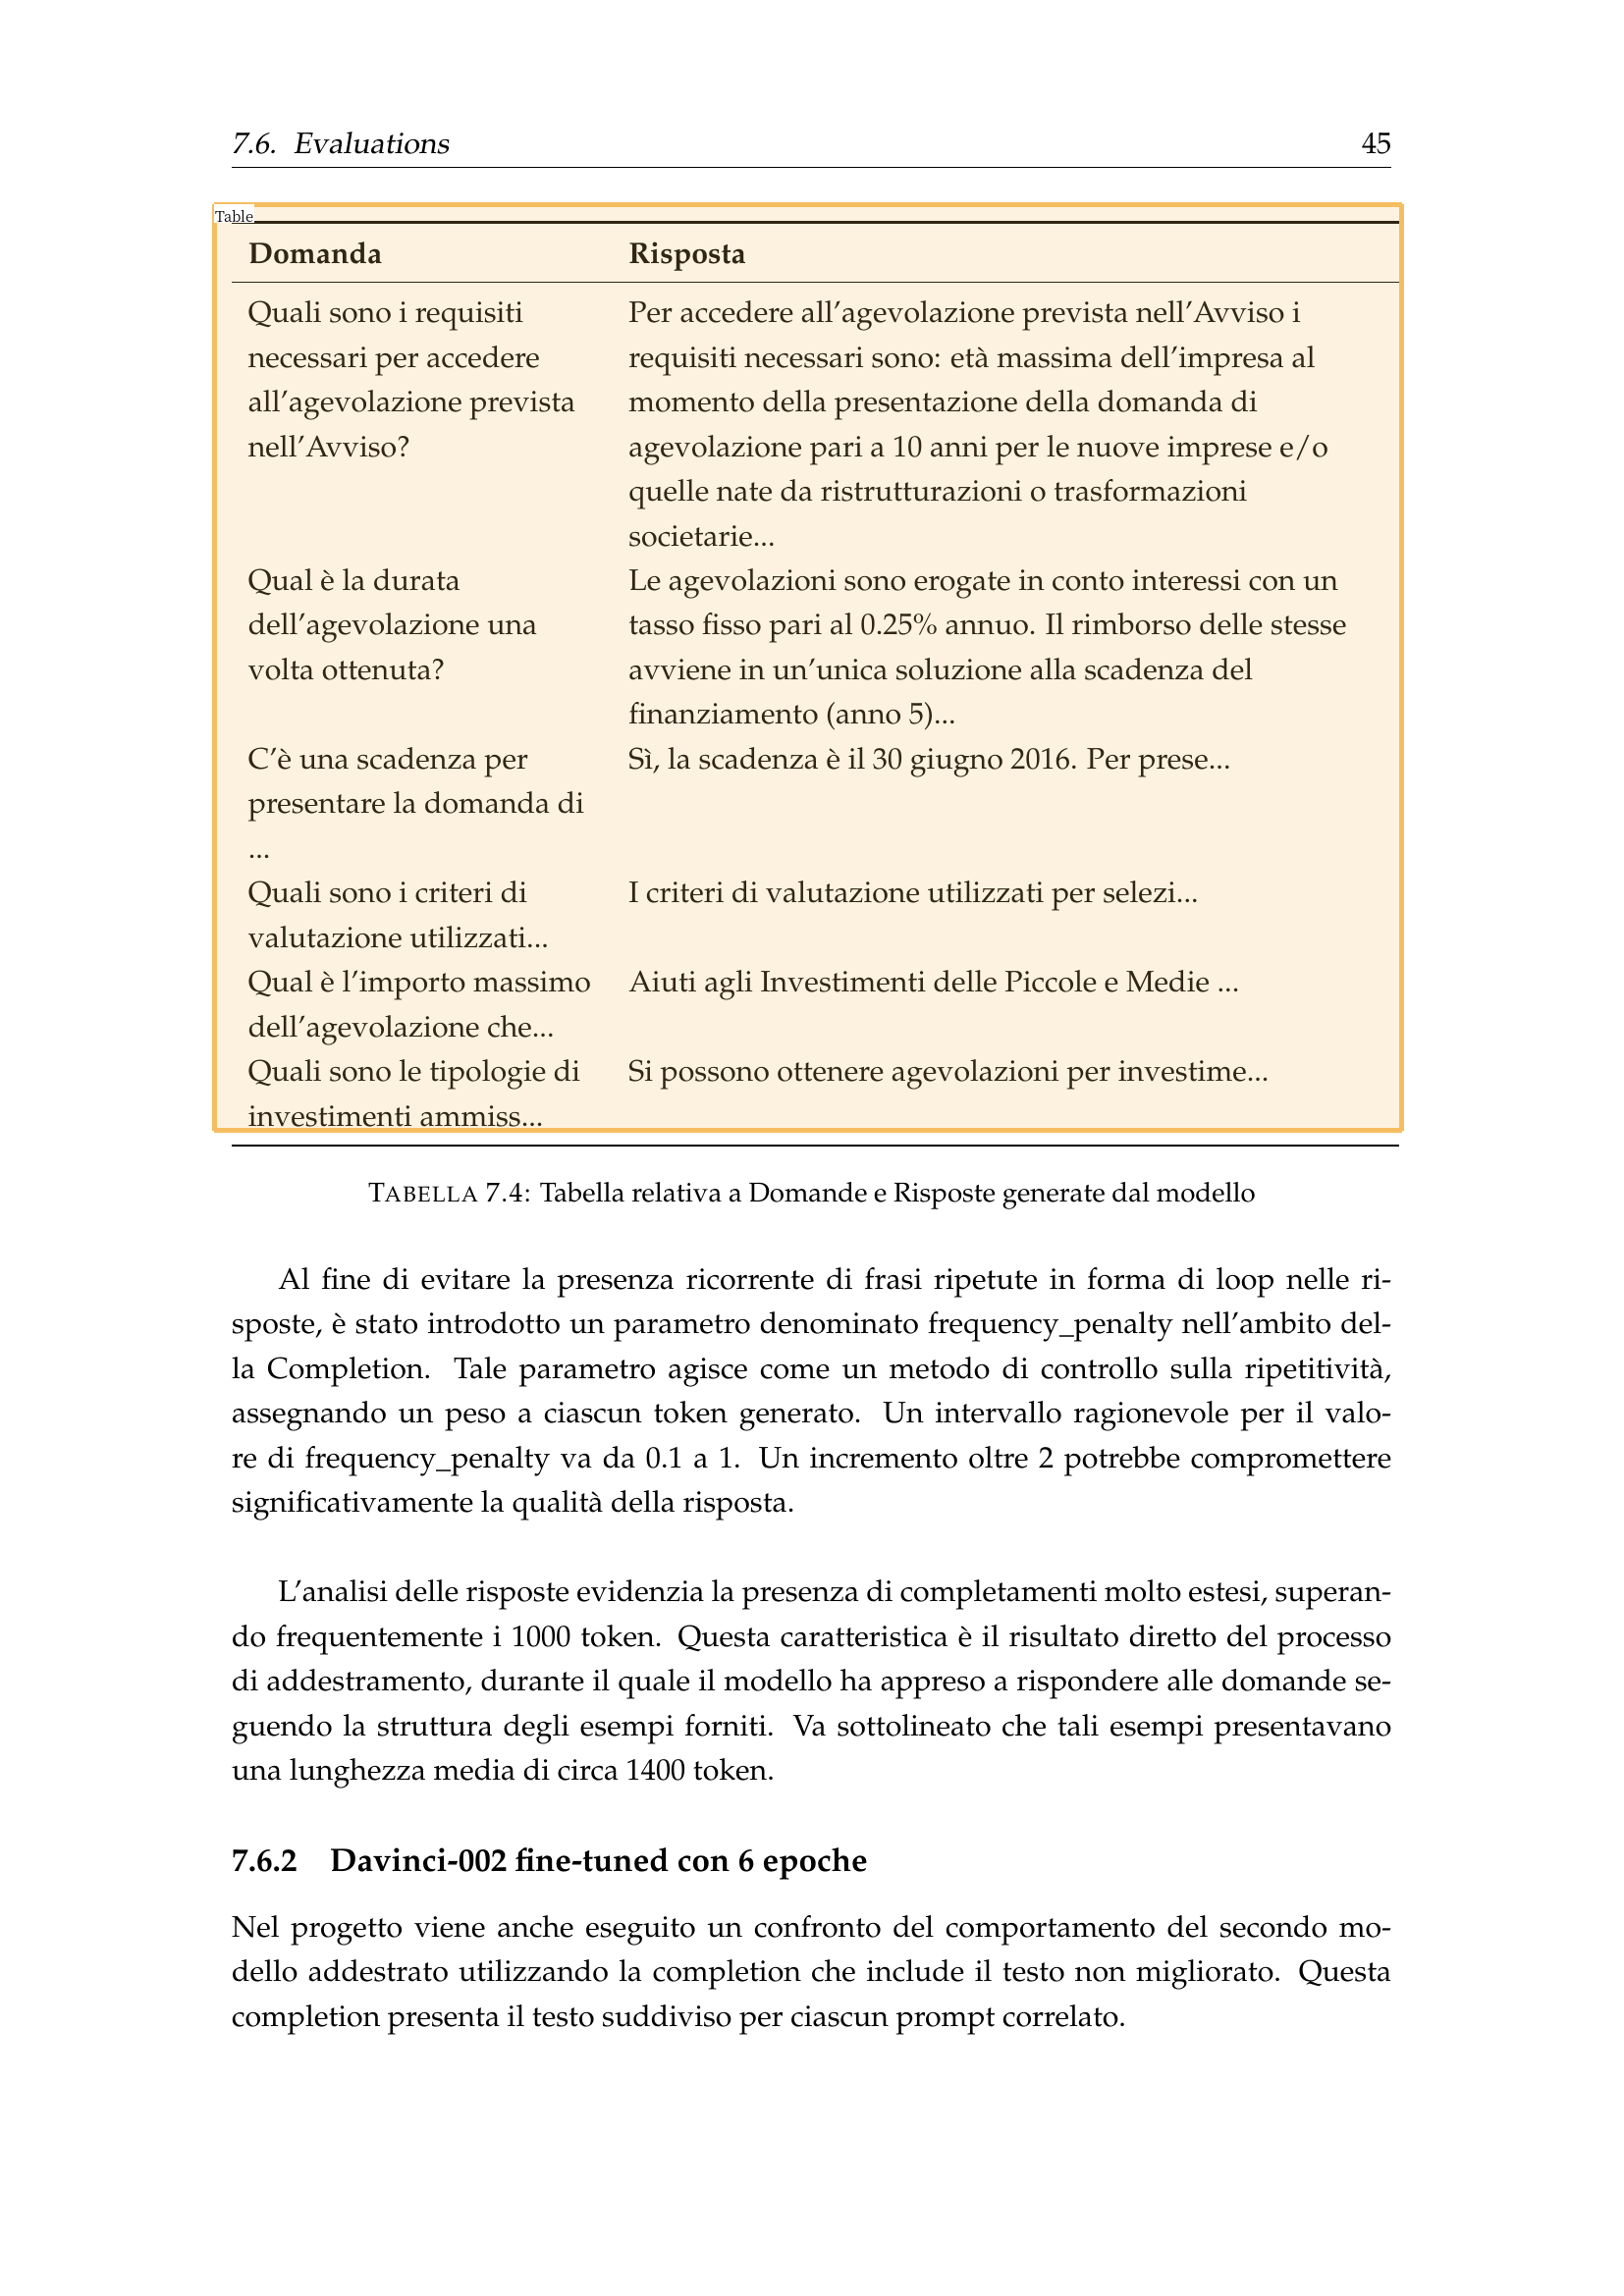

In [4]:
import layoutparser as lp
import cv2
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt

import layoutparser as lp
model = lp.models.Detectron2LayoutModel(
            config_path ='./Docs/config2.yaml', # In model catalog
            model_path = './models/TableBank-faster_rcnn_R_101_FPN_3x-model.pth',
            label_map   ={0: "Table"}, # In model`label_map`
            extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8] # Optional
        )

## turn img into array
i = 54
img = np.asarray(doc[i])
## predict
detected = model.detect(img)

print(detected[0].block)

detected[0].block.x_1 = detected[0].block.x_1 - 20
detected[0].block.y_1 = detected[0].block.y_1 - 20
detected[0].block.x_2 = detected[0].block.x_2 + 20
detected[0].block.y_2 = detected[0].block.y_2 

print(detected[0].block)
## plot
lp.draw_box(img, detected, box_width=5, box_alpha=0.2, 
            show_element_type=True)

In [12]:
!python -m pip uninstall Pillow
!python -m pip install Pillow==9.5.0

^C
  Using cached Pillow-9.5.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0


ERROR: Could not install packages due to an OSError: [WinError 5] Accesso negato: 'C:\\Users\\SIGNORILEG\\OneDrive - Links S.p.A\\Documenti\\GitHub\\RAG-with-LLamaIndex-Open\\.venv\\Lib\\site-packages\\~-l\\_imaging.cp310-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import PIL
print(PIL.__version__)


10.2.0


In [9]:
detected

Layout(_blocks=[TextBlock(block=Rectangle(x_1=216.28375244140625, y_1=1386.61474609375, x_2=1433.5194091796875, y_2=1786.6390380859375), text=None, id=None, type=Table, parent=None, next=None, score=0.9825335144996643)], page_data={})

In [10]:
# n_cols,n_rows = 1,1

# ## if single page just sort based on y
# if (n_cols == 1) and (n_rows == 1):
#     new_detected = detected.sort(key=lambda x: x.coordinates[1])
#     detected = lp.Layout([block.set(id=idx) for idx,block in enumerate(new_detected)])
    
# ## if multi columns sort by x,y
# elif (n_cols > 1) and (n_rows == 1):
#     detected = split_page(img, n_cols, axis="x")

# ## if multi rows sort by y,x
# elif (n_cols > 1) and (n_rows == 1):
#     detected = split_page(img, n_rows, axis="y")
    
# ## if multi columns-rows
# else:
#     pass

# ## check
# for block in detected:
#     print("---", str(block.id)+":", block.type, "---")
#     print(block, end='\n\n')

--- 0: Title ---
TextBlock(block=Rectangle(x_1=112.19539642333984, y_1=818.4354248046875, x_2=175.51437377929688, y_2=840.0862426757812), text=None, id=0, type=Title, parent=None, next=None, score=0.9850613474845886)

--- 1: Text ---
TextBlock(block=Rectangle(x_1=110.09349060058594, y_1=839.7466430664062, x_2=744.0230712890625, y_2=864.4215087890625), text=None, id=1, type=Text, parent=None, next=None, score=0.9992777705192566)

--- 2: Text ---
TextBlock(block=Rectangle(x_1=113.95030212402344, y_1=1215.680419921875, x_2=806.3934326171875, y_2=1392.6082763671875), text=None, id=2, type=Text, parent=None, next=None, score=0.999502420425415)

--- 3: Text ---
TextBlock(block=Rectangle(x_1=110.23043823242188, y_1=1391.049560546875, x_2=810.3519287109375, y_2=1568.0177001953125), text=None, id=3, type=Text, parent=None, next=None, score=0.9983835220336914)

--- 4: Text ---
TextBlock(block=Rectangle(x_1=116.16036224365234, y_1=1567.3951416015625, x_2=808.8767700195312, y_2=1798.311279296875),

In [64]:
print(detected)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=138.70257568359375, y_1=687.947509765625, x_2=1589.3389892578125, y_2=995.1260986328125), text=None, id=None, type=Table, parent=None, next=None, score=0.994581401348114)], page_data={})


In [65]:
print(detected[0].block.x_1)

138.70257568359375


In [7]:
## sort
new_detected = detected.sort(key=lambda x: x.coordinates[1])
## assign ids
detected = lp.Layout([block.set(id=idx) for idx,block in 
                      enumerate(new_detected)])
## check
for block in detected:
    print("---", str(block.id)+":", block.type, "---")
    print(block, end='\n\n')

--- 0: Table ---
TextBlock(block=Rectangle(x_1=199.87515258789062, y_1=241.28292846679688, x_2=1498.8673095703125, y_2=903.8861083984375), text=None, id=0, type=Table, parent=None, next=None, score=0.9873983860015869)

--- 1: Table ---
TextBlock(block=Rectangle(x_1=265.9079284667969, y_1=1126.5858154296875, x_2=1422.5673828125, y_2=1857.668701171875), text=None, id=1, type=Table, parent=None, next=None, score=0.9785364270210266)



Dopo aver fatto la detection delle tabelle estraggo la tabella con tabula da quella area

x_1: la coordinata x del bordo sinistro del blocco di testo.
y_1: la coordinata y del bordo superiore del blocco di testo.
x_2: la coordinata x del bordo destro del blocco di testo.
y_2: la coordinata y del bordo inferiore del blocco di testo.
Layout(_blocks=[TextBlock(block=Rectangle(x_1=114.86431884765625, y_1=228.65122985839844, x_2=813.8433227539062, y_2=397.3106994628906), text=None, id=None, type=Table, parent=None, next=None, score=0.9589926600456238)], page_data={})

In [31]:
print(detected)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=114.86431884765625, y_1=228.65122985839844, x_2=813.8433227539062, y_2=397.3106994628906), text=None, id=None, type=Table, parent=None, next=None, score=0.9589926600456238)], page_data={})


In [74]:
# function for rescaling xy coordinates
def scale_xy(textblock, scale=72/200):
    x_1 = textblock.block.x_1 * scale - 10
    y_1 = textblock.block.y_1 * scale - 10
    x_2 = textblock.block.x_2 * scale - 10
    y_2 = textblock.block.y_2 * scale - 10
    return y_1,x_1,y_2,x_2

new_coordinates = scale_xy(detected[0])


In [75]:
new_coordinates

(237.661103515625, 39.93292724609375, 348.2453955078125, 562.1620361328124)

From tabula documentation the area is the portion of the page to analyze(top,left,bottom,right)
Examples

[269.875,12.75,790.5,561], [[12.1,20.5,30.1,50.2], [1.0,3.2,10.5,40.2]]

In [76]:
import tabula

area = [new_coordinates[0], new_coordinates[1], new_coordinates[2],new_coordinates[3]]
print(area)
tables = tabula.read_pdf("./Docs/Fine-Tuning-pdf.pdf", pages="7", area=area, multiple_tables=False)
print(tables)




[237.661103515625, 39.93292724609375, 348.2453955078125, 562.1620361328124]
[  Unnamed: 0      1L Unnamed: 2 Unnamed: 3      2L Unnamed: 5 Unnamed: 6  \
0        NaN      CD        PCD       FPCD      CD        PCD       FPCD   
1         HS  0.1059     0.1325     0.1324  0.1059     0.1061     0.1057   
2        IHS  0.0903     0.0879     0.0882  0.0885     0.0886     0.0886   
3        GHS  0.1063     0.1062     0.1063  0.1061     0.1063     0.1061   
4       NGHS  0.1066     0.1066     0.1063  0.1065     0.1062     0.1062   
5       SGHS  0.1067     0.1067     0.1062  0.1072     0.1066     0.1063   
6     PSF-HS  0.1005     0.1006     0.0998  0.1032     0.0976     0.1007   
7         RS  0.1105     0.1101     0.1102  0.1105     0.1101     0.1096   
8   Hyper-RS  0.1062     0.1062     0.1060  0.1062     0.1062     0.1060   
9  Hyper-TPE  0.1059     0.1059     0.1058  0.1059     0.1059     0.1057   

       3L Unnamed: 8 Unnamed: 9  
0      CD        PCD       FPCD  
1  0.1059     0.10

In [77]:
print(tables[0].to_markdown())

|    | Unnamed: 0   | 1L     | Unnamed: 2   | Unnamed: 3   | 2L     | Unnamed: 5   | Unnamed: 6   | 3L     | Unnamed: 8   | Unnamed: 9   |
|---:|:-------------|:-------|:-------------|:-------------|:-------|:-------------|:-------------|:-------|:-------------|:-------------|
|  0 | nan          | CD     | PCD          | FPCD         | CD     | PCD          | FPCD         | CD     | PCD          | FPCD         |
|  1 | HS           | 0.1059 | 0.1325       | 0.1324       | 0.1059 | 0.1061       | 0.1057       | 0.1059 | 0.1058       | 0.1057       |
|  2 | IHS          | 0.0903 | 0.0879       | 0.0882       | 0.0885 | 0.0886       | 0.0886       | 0.0887 | 0.0885       | 0.0886       |
|  3 | GHS          | 0.1063 | 0.1062       | 0.1063       | 0.1061 | 0.1063       | 0.1061       | 0.1063 | 0.1065       | 0.1062       |
|  4 | NGHS         | 0.1066 | 0.1066       | 0.1063       | 0.1065 | 0.1062       | 0.1062       | 0.1069 | 0.1064       | 0.1062       |
|  5 | SGHS         | 0.106

The coordinates obtained from layoutparse doesn't match the area values for Tabula so we have to rescale it for Tabula, layoutparses use 200 as dpi, however tabula use 72 dpi for his pdf reader.

In [40]:
# function for rescaling xy coordinates
def scale_xy(textblock, scale=72/200):
    x1 = textblock.block.x_1 * scale
    y1 = textblock.block.y_1 * scale
    x2 = textblock.block.x_2 * scale
    y2 = textblock.block.y_2 * scale
    return (x1,y1,x2,y2)

In [29]:
'''
{'0-Title': '...',
 '1-Text':  '...', 
 '2-Figure': array([[ [0,0,0], ...]]),
 '3-Table': pd.DataFrame,
}
'''
def parse_doc(dic):
    for k,v in dic.items():
        if "Title" in k:
            print('\x1b[1;31m'+ v +'\x1b[0m')
        elif "Figure" in k:
            plt.figure(figsize=(10,5))
            plt.imshow(v)
            plt.show()
        else:
            print(v)
        print(" ")

In [30]:
# load model
model = lp.ocr.TesseractAgent(languages='eng+ita')
dic_predicted = {}

for block in [block for block in detected if block.type == "Table"]:
    ## segmentation
    segmented = block.pad(left=15, right=15, top=5, 
                bottom=5).crop_image(img)
    ## extraction
    extracted = model.detect(segmented)
    ## save
    dic_predicted[str(block.id)+"-"+block.type] = pd.read_csv(io.StringIO(extracted) )
# check
parse_doc(dic_predicted)

                                            1L 2L 3L
0                cD PCD FPCD cD PCD FPCD cD PCD FPCD
1  HS 0.1695 0.1696 0.1691 0.1695 0.1699 0.1693 0...
2  IHS 0.1696 0.1695 0.1693 0.1609 0.1607 0.1612 ...
3  GHS 0.1699 0.1697 0.1692 0.1699 0.1698 0.1695 ...
4  NGHS 0.1706 0.1703 0.1697 0.1697 0.1703 0.1694...
5  SGHS 0.1703 0.1703 0.1701 0.1709 0.1706 0.1700...
6  PSF-HS 0.1663 0.1670 0.1670 0.1689 0.1691 0.16...
7  RS 0.1755 0.1759 0.1743 0.1758 0.1755 0.1748 0...
8  Hyper-RS 0.1696 0.1697 0.1694 0.1662 0.1662 0....
9  Hyper-TPE 0.1694 0.1693 0.1691 0.1693 0.1693 0...
 


In [31]:
df1 = pd.read_csv(io.StringIO(extracted))
df1

,1L 2L 3L
0,cD PCD FPCD cD PCD FPCD cD PCD FPCD
1,HS 0.1695 0.1696 0.1691 0.1695 0.1699 0.1693 0...
2,IHS 0.1696 0.1695 0.1693 0.1609 0.1607 0.1612 ...
3,GHS 0.1699 0.1697 0.1692 0.1699 0.1698 0.1695 ...
4,NGHS 0.1706 0.1703 0.1697 0.1697 0.1703 0.1694...
5,SGHS 0.1703 0.1703 0.1701 0.1709 0.1706 0.1700...
6,PSF-HS 0.1663 0.1670 0.1670 0.1689 0.1691 0.16...
7,RS 0.1755 0.1759 0.1743 0.1758 0.1755 0.1748 0...
8,Hyper-RS 0.1696 0.1697 0.1694 0.1662 0.1662 0....
9,Hyper-TPE 0.1694 0.1693 0.1691 0.1693 0.1693 0...


In [14]:
for block in [block for block in detected if block.type in ["Title","Text"]]:
    ## segmentation
    segmented = block.pad(left=15, right=15, top=5, 
                bottom=5).crop_image(img)
    ## extraction
    extracted = model.detect(segmented)
    ## save
    dic_predicted[str(block.id)+"-"+block.type] =  extracted.replace('\n',' ').strip()
# check
parse_doc(dic_predicted)

Table 3
 
Average MSE over the test set considering CalTech 101 Silhouettes dataset.
 
IHS obtained the best results, but now with a DBN using three lay- ers and FPCD as the learning algorithm. As aforementioned, it is expected a better resulting using a deeper DBN, since this dataset present more complex shapes, thus requiring better learned fea- tures. Table 3 displays such results, being the bolded values the similar techniques with the lowest errors.
 
Fig. 6a shows the logarithm of the Pseudo-likelihood (PL) at the second layer considering all training samples for a given execution of IHS-based DBN fine-tuning with PCD and FPCD using three layers, and Fig. 6b depicts the very same information for RS. These results follow the same pattern observed in Table 3, i.e., the greater PL values, the smaller the amount of reconstruction error.
 
The proposed approach performs a greedy-based optimization at each layer, as usually recommended by the literature. Therefore, we need to re-run HS

Fig. 5. Logarithm of the Pseudo-likelihood values considering (a) IHS and (b) RS for MNIST dataset.
 
Table 3
 
Average MSE over the test set considering CalTech 101 Silhouettes dataset.
 
IHS obtained the best results, but now with a DBN using three lay- ers and FPCD as the learning algorithm. As aforementioned, it is expected a better resulting using a deeper DBN, since this dataset present more complex shapes, thus requiring better learned fea- tures. Table 3 displays such results, being the bolded values the similar techniques with the lowest errors.
 
challenging task, since the techniques used in this work obtained the highest errors on such data. Such behaviour favoured a larger number of layers, since the best results were obtained with IHS using CD and 3 layers. Therefore, a larger number of layers allows a better description of the data.
 
Fig. 7a shows the logarithm of the Pseudo-likelihood (PL) at the first layer considering all training samples for a given execution of IHS

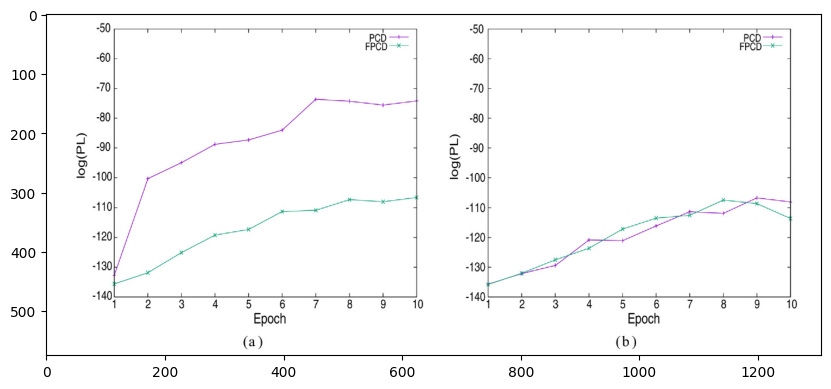

In [14]:
for block in [block for block in detected if block.type == "Figure"]:
    ## segmentation
    segmented = block.pad(left=15, right=15, top=5, 
                          bottom=5).crop_image(img)
    ## save
    dic_predicted[str(block.id)+"-"+block.type] = segmented
# check
parse_doc(dic_predicted)

/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[2024-03-25 17:13:31,523] [ WARNING] checkpoint.py:352 - The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/py310/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


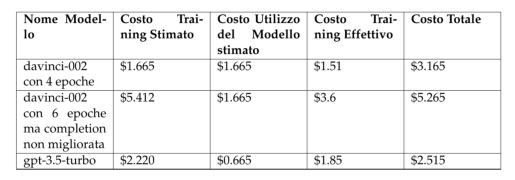

mar 25, 2024 5:13:59 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
AVVERTENZA: Using fallback font LiberationSans for base font Symbol
mar 25, 2024 5:13:59 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
AVVERTENZA: Using fallback font LiberationSans for base font ZapfDingbats
[2024-03-25 17:14:01,016] [   ERROR] pdf_ingestion.py:129 - Error extracting table: Invalid type <class 'PIL.Image.Image'> for src argument. Proceeding with text extraction only.


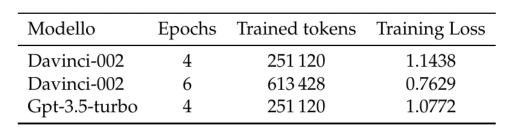

[2024-03-25 17:14:02,465] [   ERROR] pdf_ingestion.py:129 - Error extracting table: Invalid type <class 'PIL.Image.Image'> for src argument. Proceeding with text extraction only.


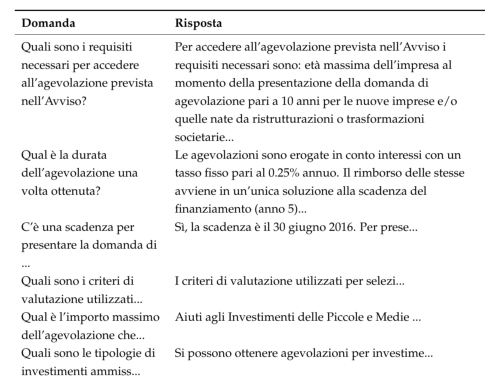

[2024-03-25 17:14:05,226] [   ERROR] pdf_ingestion.py:129 - Error extracting table: Invalid type <class 'PIL.Image.Image'> for src argument. Proceeding with text extraction only.


In [3]:
from pdf_parser import pdf_ingestion
pdf_path = "/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/testdoc/Tesi_Giacomo_Signorile (8).pdf"

documents, md_tables, md_tables_ocr = pdf_ingestion.replace_tables_in_text(pdf_path)

In [3]:
md_tables

['| Nome Model-    | Costo Trai-   | Costo Utilizzo   | Costo Trai-.1   | Costo Totale   |\n|:---------------|:--------------|:-----------------|:----------------|:---------------|\n| lo             | ning Stimato  | del Modello      | ning Effettivo  |                |\n|                |               | stimato          |                 |                |\n| davinci-002    | $1.665        | $1.665           | $1.51           | $3.165         |\n| con 4 epoche   |               |                  |                 |                |\n| davinci-002    | $5.412        | $1.665           | $3.6            | $5.265         |\n| con 6 epoche   |               |                  |                 |                |\n| ma completion  |               |                  |                 |                |\n| non migliorata |               |                  |                 |                |\n| gpt-3.5-turbo  | $2.220        | $0.665           | $1.85           | $2.515         |',
 '| Mod

In [4]:
md_tables_ocr

[]